In [2]:
import pathlib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from absl import logging
from matplotlib.colors import ListedColormap
from rte_dataset.builders import pipeline

In [15]:
original_data_path = pathlib.Path(
    "/workspaces/deeprte/data/raw_data/train/g0.1-q0.003/postprocess/processed_results.npz"
)

p = pipeline.DataPipeline(original_data_path.parent, [original_data_path.name])
raw_data = p.process()


In [17]:
# 创建一个新的字典来存储数据
data = np.load(original_data_path)
new_data = {}
for key in data.keys():
    if key == "psi":
        # 对 psi 数组进行修改
        new_data[key] = np.maximum(data[key], 0)
    else:
        # 其他数据保持不变
        new_data[key] = data[key]

# 如果需要保存修改后的数据
np.savez(original_data_path, **new_data)

In [3]:
raw_data.keys()

dict_keys(['functions', 'grid', 'shape'])

In [4]:
raw_data["functions"].keys()

dict_keys(['sigma', 'psi_label', 'scattering_kernel', 'boundary_scattering_kernel', 'self_scattering_kernel', 'boundary', 'basis_weights', 'basis_inner_product'])

In [5]:
raw_data["functions"]["psi_label"].shape


(500, 40, 40, 24)

In [6]:
def plot_phi(r, phi_pre, phi_label):
    fig, _axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    fig.subplots_adjust(hspace=0.3)
    axs = _axs.flatten()

    viridis = matplotlib.colormaps["viridis"](np.linspace(0, 1.2, 128))
    cs_1 = axs[0].contourf(
        r[..., 0], r[..., 1], phi_label, cmap=ListedColormap(viridis)
    )
    axs[0].set_title(r"Exact $f(x,v)$", fontsize=20)
    axs[0].tick_params(axis="both", labelsize=15)
    cbar = fig.colorbar(cs_1)
    cbar.ax.tick_params(labelsize=16)

    cs_2 = axs[1].contourf(r[..., 0], r[..., 1], phi_pre, cmap=ListedColormap(viridis))
    axs[1].set_title(r"Predict $f(x,v)$", fontsize=20)
    axs[1].tick_params(axis="both", labelsize=15)
    cbar = fig.colorbar(cs_2)
    cbar.ax.tick_params(labelsize=16)

    cs_3 = axs[2].contourf(
        r[..., 0],
        r[..., 1],
        abs(phi_pre - phi_label),
        cmap=ListedColormap(viridis),
    )
    axs[2].set_title(r"Absolute error", fontsize=20)
    axs[2].tick_params(axis="both", labelsize=15)
    cbar = fig.colorbar(cs_3)
    cbar.ax.tick_params(labelsize=16)

    plt.tight_layout()


In [7]:
raw_data["grid"].keys()

dict_keys(['position_coords', 'velocity_coords', 'phase_coords', 'boundary_coords', 'boundary_weights', 'velocity_weights'])

In [8]:
phi = raw_data["functions"]["psi_label"][0] @ raw_data["grid"]["velocity_weights"]

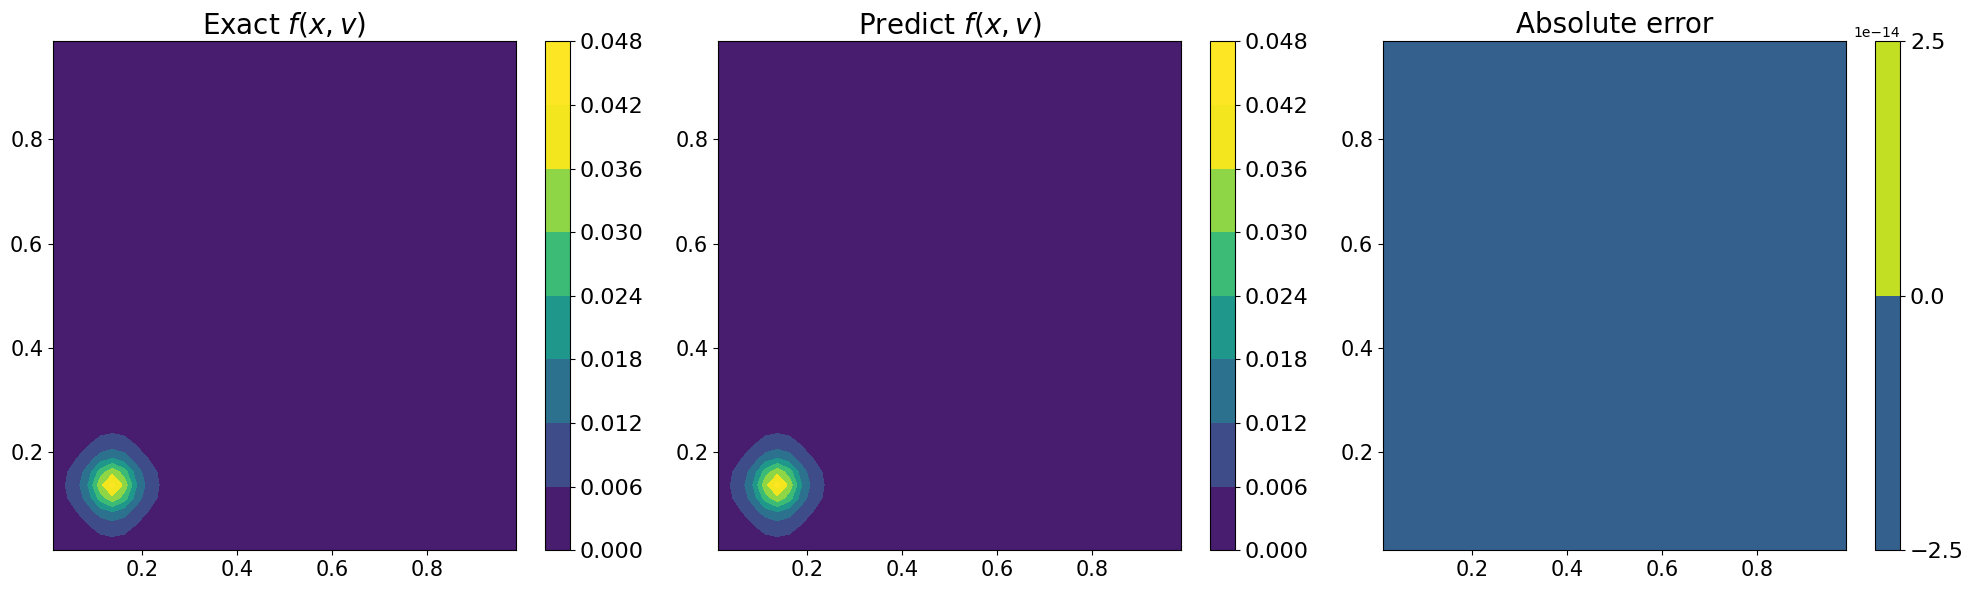

In [9]:
plot_phi(raw_data["grid"]["position_coords"], phi, phi)
